In [91]:
# 1) Read the data
# 2) Apply the missing value analysis
# 3) The output column name is Churn, 
#        Problem might face:
#       when you read you will see as a float values, so convert into int type
#       use astype method to convert
# 4) Drop the unwanted columns
# 5) Apply label encoder
# 6) Perform the ML Decision tree ,Logistic regression ,KNN and Random forest  with out hyper parameter tuning
# 7) Perform the ML Decision tree ,Logistic regression ,KNN and Random forest  with  hyper parameter tuning
# 8) Save the best model using joblib 
#       Explore:
#             Do not pickle .
#             explore this how to save and load the model using joblib
#             You should know two ways how to save model
# 9) Create an end point Flask application 
#       Problem might be face :
#         when you use the saved model you might encounter package version issues check that
#         when you develop a model what is the package versions
#         when you are using the model in vscode what is the package versions
# 10) Develop a streamlit application

In [205]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [206]:
df=pd.read_csv("data_regression.csv")
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [207]:
df['churn'].value_counts()

churn
0.0    1703
1.0     262
Name: count, dtype: int64

# categorical caolumns

In [208]:
cat_col=df.select_dtypes(include="object")
cat_col

,phone_no,gender,multi_screen,mail_subscribed
0,409-8743,Female,no,no
1,340-5930,Female,no,no
2,372-3750,Female,no,no
3,331-4902,Female,no,yes
4,351-8398,Female,no,no
...,...,...,...,...
1995,385-7387,Female,no,yes
1996,383-9255,Male,no,no
1997,353-2080,NaN,no,no
1998,359-7788,Male,no,no


In [209]:
cat_col.isnull().sum()

phone_no            0
gender             24
multi_screen        0
mail_subscribed     0
dtype: int64

In [210]:
# we fill the missing value in catgorical columns

In [211]:
df['gender'].value_counts()

gender
Male      1053
Female     923
Name: count, dtype: int64

In [212]:
df['gender'].mode()

0    Male
Name: gender, dtype: object

In [213]:
name_mode=df['gender'].mode()[0]
df['gender'].fillna(name_mode,inplace=True)
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [214]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [215]:
# cat_col=df.select_dtypes(include="object")
# cat_col.isnull().sum()

# numerical columns

In [216]:
num_col=df.select_dtypes(exclude="object")
num_col.isnull().sum()

year                       0
customer_id                0
age                        0
no_of_days_subscribed      0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [217]:
# we fill the missing values in  numerical columns

In [218]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df['churn'] = imputer.fit_transform(df[['churn']])
df['maximum_days_inactive'] = imputer.fit_transform(df[['maximum_days_inactive']])

In [219]:
df.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [220]:
for i in df.columns:
    if df[i].dtype == "float64":
        df[i]=df[i].astype(int)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    2000 non-null   int64 
 1   customer_id             2000 non-null   int64 
 2   phone_no                2000 non-null   object
 3   gender                  2000 non-null   object
 4   age                     2000 non-null   int64 
 5   no_of_days_subscribed   2000 non-null   int64 
 6   multi_screen            2000 non-null   object
 7   mail_subscribed         2000 non-null   object
 8   weekly_mins_watched     2000 non-null   int32 
 9   minimum_daily_mins      2000 non-null   int32 
 10  maximum_daily_mins      2000 non-null   int32 
 11  weekly_max_night_mins   2000 non-null   int64 
 12  videos_watched          2000 non-null   int64 
 13  maximum_days_inactive   2000 non-null   int32 
 14  customer_support_calls  2000 non-null   int64 
 15  chur

##  Drop the unwanted columns

In [222]:
df=df.drop(columns=['year','customer_id','phone_no'])

In [223]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148,12,16,82,1,4,1,0
1,Female,39,149,no,no,294,7,33,87,3,3,2,0
2,Female,65,126,no,no,87,11,9,91,1,4,5,1
3,Female,24,131,no,yes,321,9,36,102,4,3,3,0
4,Female,40,191,no,no,243,10,27,83,7,3,1,0


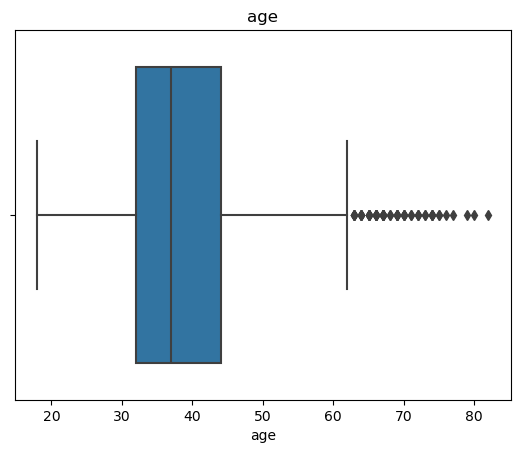

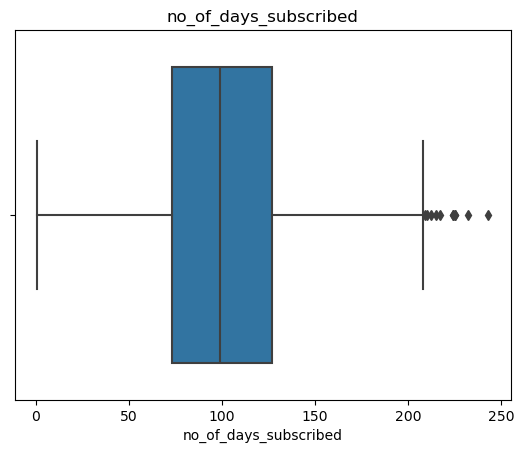

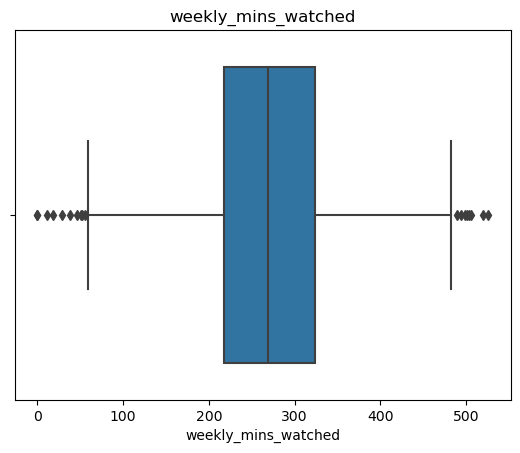

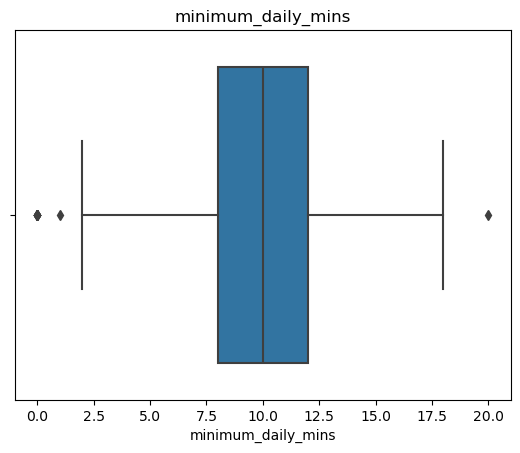

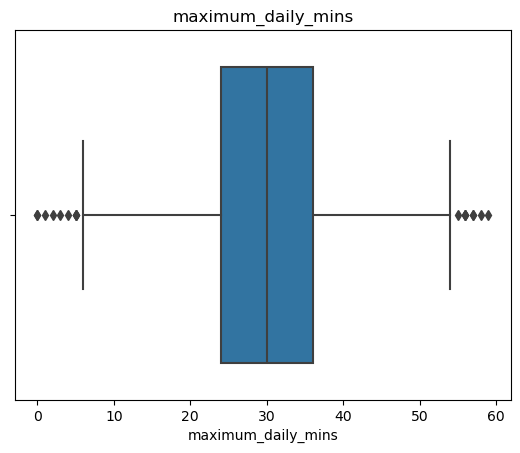

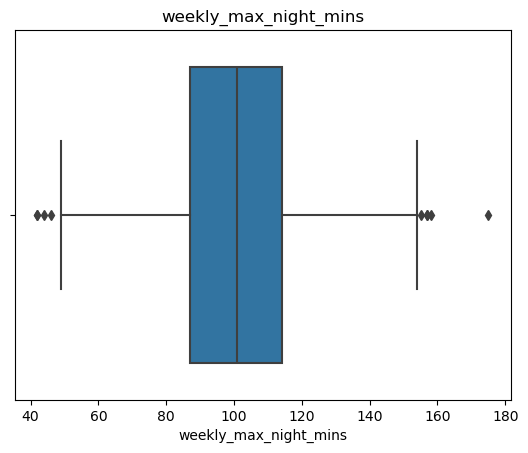

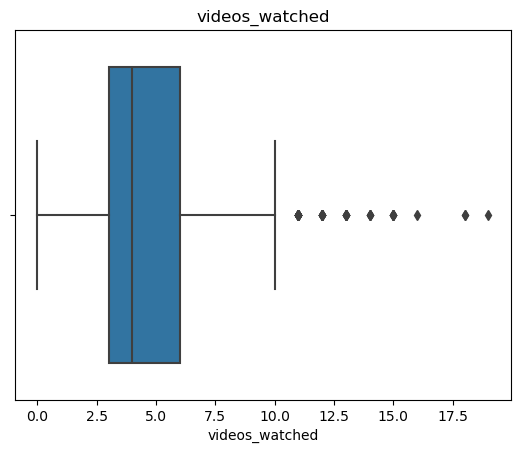

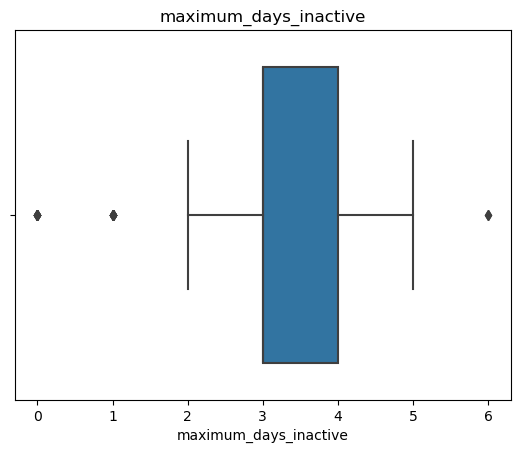

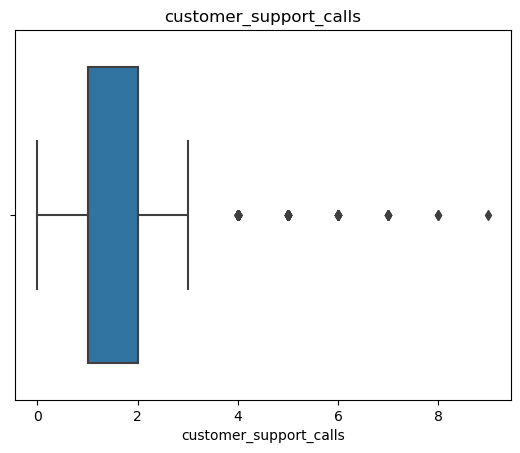

In [224]:
num_col=df.select_dtypes(exclude="object").columns.to_list()
for i in num_col[:-1]:
    sns.boxplot(x=df[i],orient="h")
    plt.title(i)
    plt.show()

===================================age===========================================
[65, 63, 67, 64, 66, 66, 66, 76, 66, 64, 66, 75, 66, 74, 65, 77, 67, 63, 82, 74, 80, 71, 67, 73, 74, 71, 67, 70, 65, 66, 72, 66, 63, 69, 64, 75, 73, 67, 67, 67, 72, 67, 69, 68, 79, 68, 74, 69, 69, 70, 69, 64, 63, 64, 70, 65, 65, 63, 65, 72, 69, 67, 70]
AGE skew : 0.9582239125921497


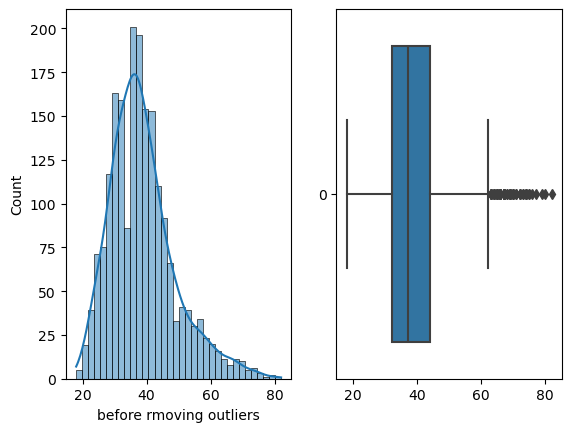

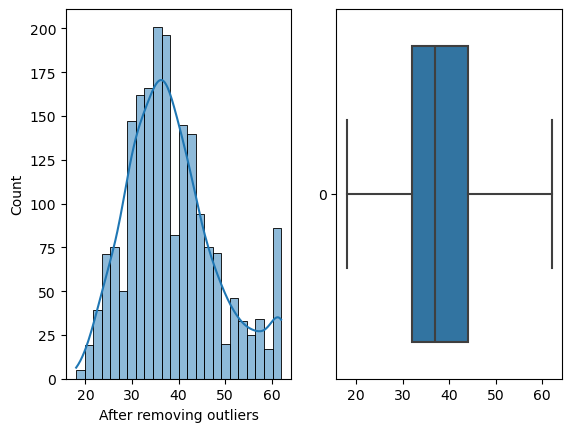

AGE skew : 0.6358314777042139
===================================no_of_days_subscribed===========================================
[210, 232, 225, 224, 212, 215, 243, 224, 225, 217, 209]
NO_OF_DAYS_SUBSCRIBED skew : 0.14909079682262305


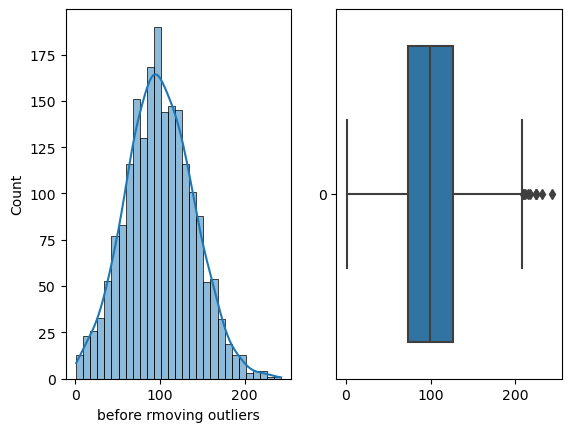

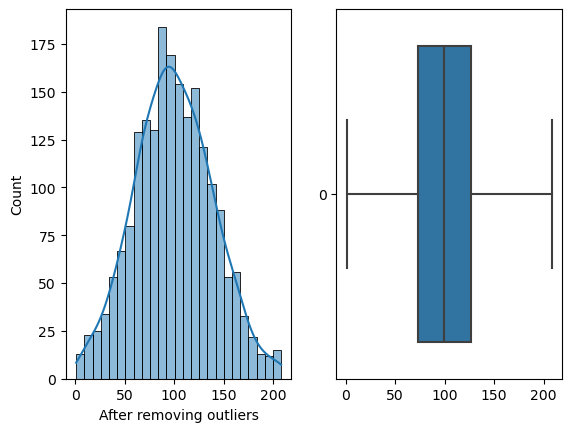

NO_OF_DAYS_SUBSCRIBED skew : 0.1064453745115176
===================================weekly_mins_watched===========================================
[499, 494, 29, 38, 52, 0, 46, 18, 501, 51, 506, 526, 0, 56, 520, 11, 503, 489]
WEEKLY_MINS_WATCHED skew : -0.06709054537363729


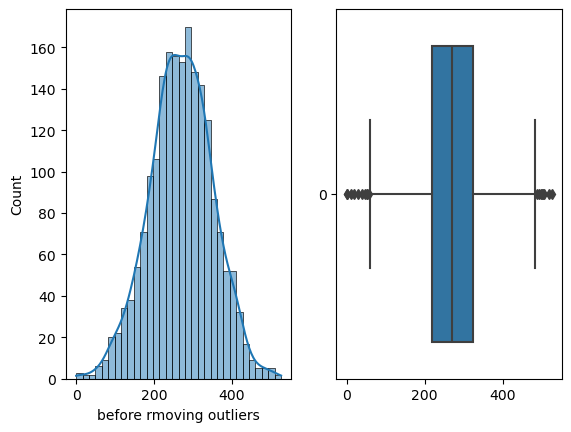

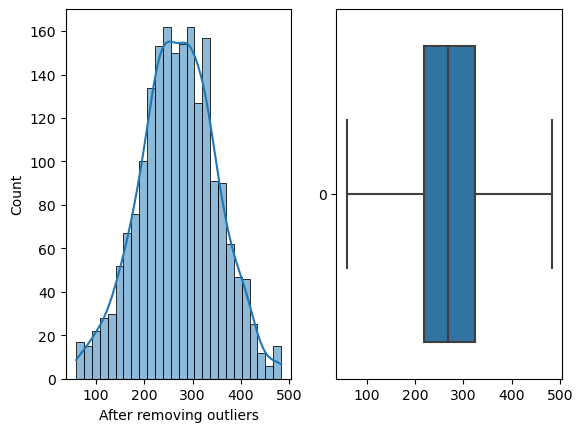

WEEKLY_MINS_WATCHED skew : -0.05125635371084123
===================================minimum_daily_mins===========================================
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0]
MINIMUM_DAILY_MINS skew : -0.12329337073564645


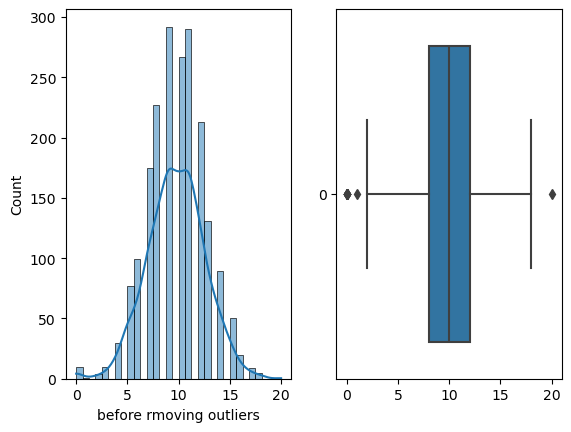

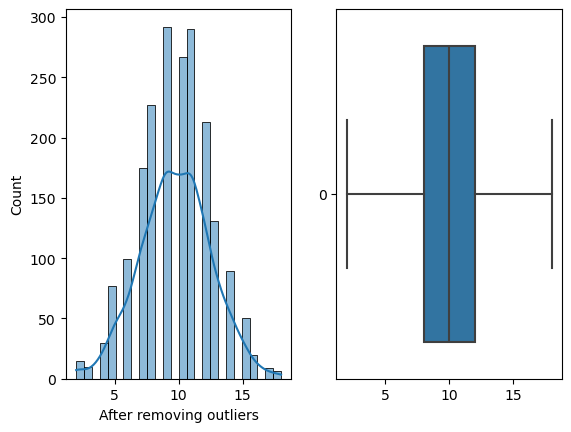

MINIMUM_DAILY_MINS skew : -0.03613592190979797
===================================maximum_daily_mins===========================================
[56, 56, 3, 4, 5, 0, 5, 2, 56, 5, 57, 59, 0, 58, 1, 57, 55]
MAXIMUM_DAILY_MINS skew : -0.06766454365736048


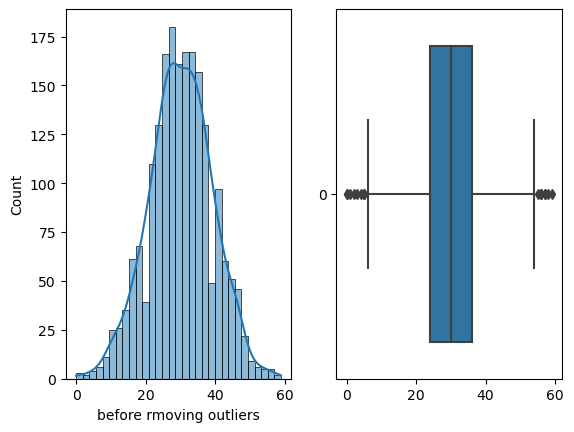

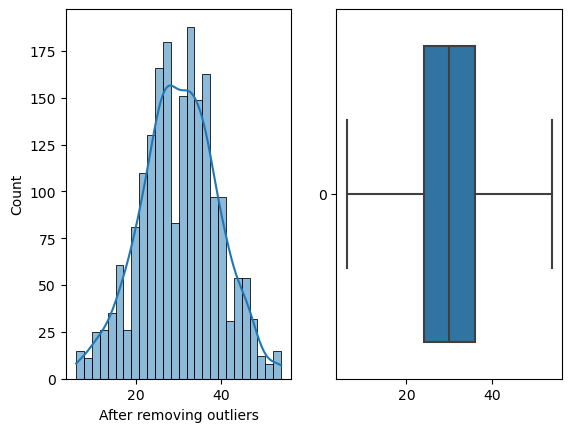

MAXIMUM_DAILY_MINS skew : -0.05858266694866906
===================================weekly_max_night_mins===========================================
[155, 157, 157, 42, 158, 42, 46, 175, 44]
WEEKLY_MAX_NIGHT_MINS skew : -5.8364250005396545e-05


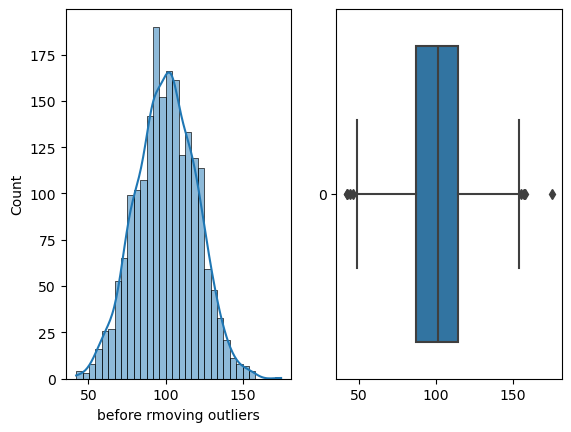

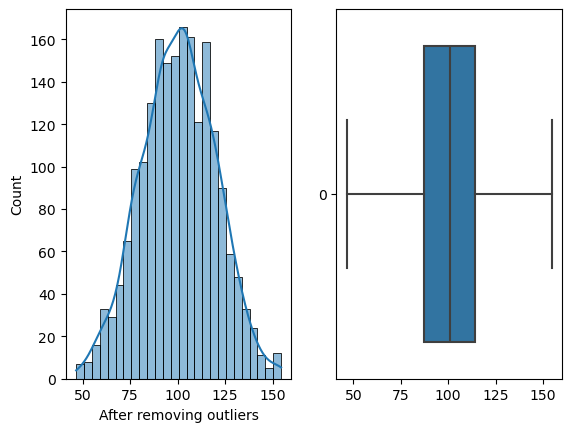

WEEKLY_MAX_NIGHT_MINS skew : -0.014144917444136195
===================================videos_watched===========================================
[14, 11, 13, 11, 18, 15, 11, 11, 15, 11, 13, 12, 15, 11, 12, 15, 13, 11, 13, 11, 11, 12, 13, 13, 13, 12, 14, 11, 11, 12, 11, 12, 19, 14, 11, 12, 12, 13, 15, 11, 18, 11, 11, 11, 14, 11, 12, 15, 12, 11, 16]
VIDEOS_WATCHED skew : 1.309208878643555


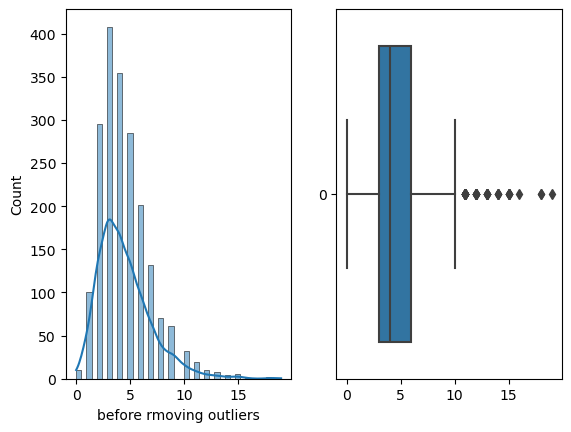

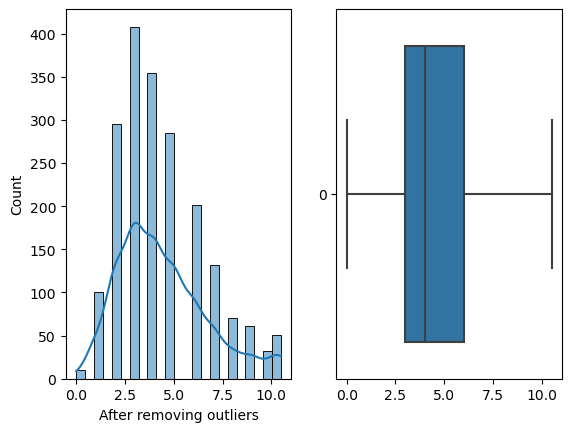

VIDEOS_WATCHED skew : 0.7778810941721188
===================================maximum_days_inactive===========================================
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 6, 1, 1, 6, 1, 1, 1, 0, 1, 1, 1]
MAXIMUM_DAYS_INACTIVE skew : -0.23852084695443798


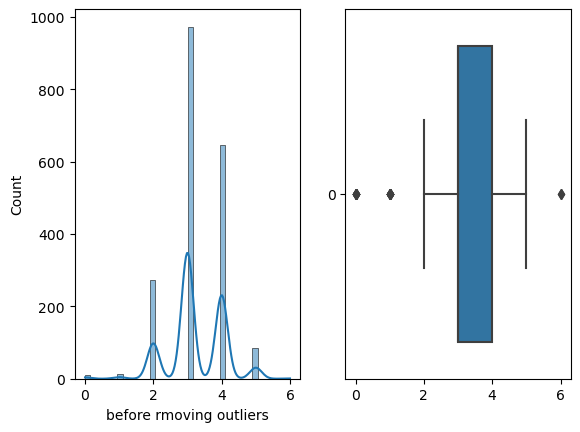

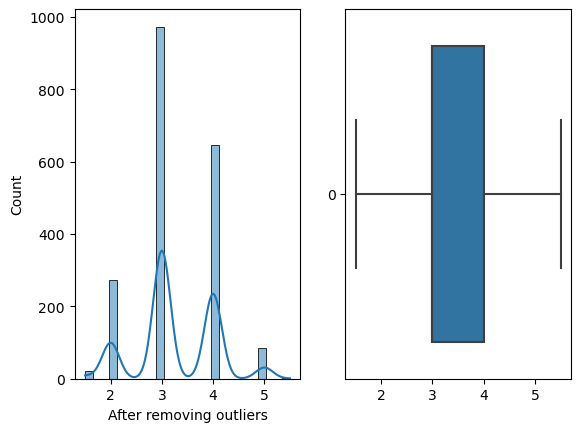

MAXIMUM_DAYS_INACTIVE skew : 0.06468938198081366
===================================customer_support_calls===========================================
[5, 4, 5, 4, 4, 5, 4, 4, 5, 5, 7, 4, 4, 7, 4, 4, 4, 7, 4, 4, 8, 6, 5, 4, 4, 4, 5, 9, 4, 4, 7, 7, 4, 5, 4, 4, 4, 5, 4, 5, 4, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 6, 5, 5, 4, 5, 5, 6, 4, 4, 4, 4, 5, 4, 5, 4, 4, 5, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 5, 6, 4, 4, 6, 5, 4, 4, 5, 4, 4, 4, 5, 5, 6, 4, 4, 6, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 6, 7, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 5, 4, 4, 5, 4, 5, 4, 4, 5, 4, 4, 6, 4, 5, 4, 4]
CUSTOMER_SUPPORT_CALLS skew : 1.128123987668132


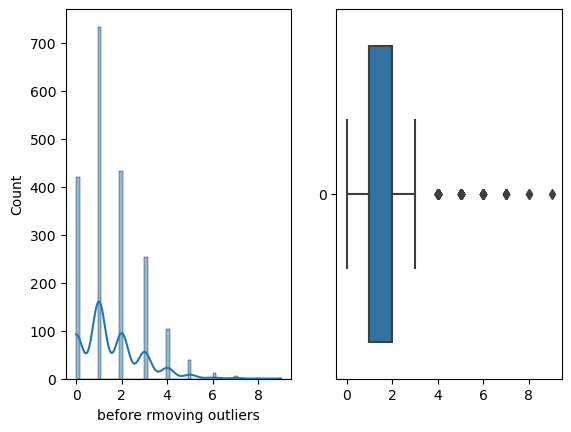

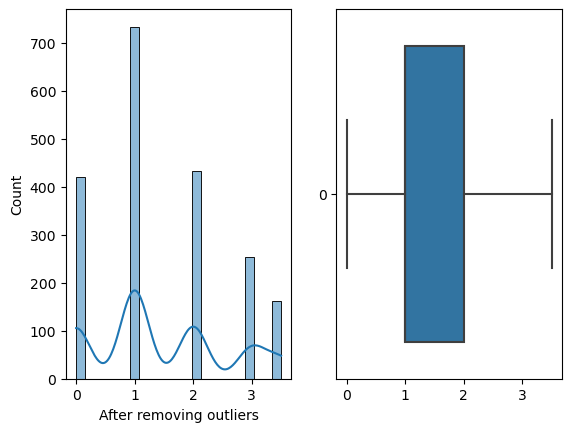

CUSTOMER_SUPPORT_CALLS skew : 0.36007153312336887


In [225]:
for i in num_col[:-1]:
    q1 = np.percentile(df[i],25)
    q2 = np.percentile(df[i],50)
    q3 = np.percentile(df[i],75)
    iqr= q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    outliers = [x for x in df[i] if x <lower_bound or x> upper_bound]
    print(f'==================================={i}===========================================')
    print(outliers)
    skew = df[i].skew()
    print(f'{i.upper()} skew : {skew}')
    plt.subplot(1,2,1)
    plt.xlabel("before rmoving outliers")
    sns.histplot(df[i],kde = True)
    #plt.show()
    plt.subplot(1,2,2)
    sns.boxplot(df[i],orient="h")
    plt.show()
    df[i]= np.where(df[i] > upper_bound, upper_bound,df[i])
    df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])
    plt.subplot(1,2,1)
    sns.histplot(df[i],kde = True)
    plt.xlabel("After removing outliers")
    plt.subplot(1,2,2)
    sns.boxplot(df[i],orient="h")
    plt.show()
    skew = df[i].skew()
    print(f"{i.upper()} skew : {skew}")
    print("===========================================")
    

## apply labelEncoder

In [226]:
from sklearn.preprocessing import LabelEncoder
cat_col = df.select_dtypes(include="object").columns.to_list()
df[cat_col]= df[cat_col].apply(LabelEncoder().fit_transform)

In [227]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36.0,62.0,0,0,148.0,12.0,16.0,82.0,1.0,4.0,1.0,0
1,0,39.0,149.0,0,0,294.0,7.0,33.0,87.0,3.0,3.0,2.0,0
2,0,62.0,126.0,0,0,87.0,11.0,9.0,91.0,1.0,4.0,3.5,1
3,0,24.0,131.0,0,1,321.0,9.0,36.0,102.0,4.0,3.0,3.0,0
4,0,40.0,191.0,0,0,243.0,10.0,27.0,83.0,7.0,3.0,1.0,0


In [228]:
columns_to_standardize = df.columns[:-1]

In [229]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(df[columns_to_standardize])
df[columns_to_standardize]= ss.transform(df[columns_to_standardize])

In [230]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,-1.080207,-0.258209,-0.953242,-0.331478,-0.631349,-1.524740,0.810723,-1.561271,-0.945840,-1.493191,0.964081,-0.416850,0
1,-1.080207,0.054330,1.247948,-0.331478,-0.631349,0.303508,-1.000544,0.316518,-0.688913,-0.621318,-0.333471,0.486889,0
2,-1.080207,2.450455,0.666024,-0.331478,-0.631349,-2.288596,0.448470,-2.334479,-0.483371,-1.493191,0.964081,1.842498,1
3,-1.080207,-1.508361,0.792529,-0.331478,1.583910,0.641608,-0.276037,0.647893,0.081870,-0.185382,-0.333471,1.390628,0
4,-1.080207,0.158509,2.310591,-0.331478,-0.631349,-0.335127,0.086216,-0.346231,-0.894455,1.122427,-0.333471,-0.416850,0


In [231]:
df.to_csv('churn_normalize_data.csv',index=False)

# model Development

In [246]:
x=df.drop(columns='churn')
y=df['churn']

In [255]:
# x_train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [256]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [257]:
models = {
    'decision_tree': DecisionTreeClassifier(),
    "LogisticRegression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    'RandomForestClassifier' : RandomForestClassifier()

}

In [258]:
for model_name,model in models.items():
    #print(model_name)
    #print(model)
    # fit the model
    model.fit(x_train,y_train)
    # prediction
    y_pred=model.predict(x_test)
    # model Evaluation
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    # model prediction
    print(f'Accuracy Score of {model_name}:{round(accuracy*100,2)}')
    print(f'Precision score of  {model_name}:{round(precision*100,2)}')
    print(f'Recall Score of {model_name}:{round(recall*100,2)}')
    print(f'F1_Score of {model_name}:{round(f1*100,2)}')

Accuracy Score of decision_tree:86.0
Precision score of  decision_tree:41.51
Recall Score of decision_tree:46.81
F1_Score of decision_tree:44.0
Accuracy Score of LogisticRegression:87.5
Precision score of  LogisticRegression:36.36
Recall Score of LogisticRegression:8.51
F1_Score of LogisticRegression:13.79
Accuracy Score of KNN:88.25
Precision score of  KNN:50.0
Recall Score of KNN:17.02
F1_Score of KNN:25.4
Accuracy Score of RandomForestClassifier:90.25
Precision score of  RandomForestClassifier:60.53
Recall Score of RandomForestClassifier:48.94
F1_Score of RandomForestClassifier:54.12


0.91
